In [32]:
import pandas as pd
import numpy as np
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.head(20)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Not assigned


WE WILL DROP ALL THE ROWS WHERE BOROUGH IS NOT ASSIGNED

In [22]:
Toronto_data = df[df['Borough'] != 'Not assigned'].reset_index(drop=True)
Toronto_data.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


WE WILL CREATE NEW DATAFRAME WITH UNIQUE POSTCODE VALUES

In [34]:
new=Toronto_data.drop_duplicates('Postcode')
new.head(10)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
5,M7A,Downtown Toronto,Queen's Park
6,M9A,Queen's Park,Not assigned
7,M1B,Scarborough,Rouge
9,M3B,North York,Don Mills North
10,M4B,East York,Woodbine Gardens
12,M5B,Downtown Toronto,Ryerson


Making non assigned neighbourhoods same like borough

In [44]:
new['Neighbourhood'] = np.where(new['Neighbourhood'] == 'Not assigned', new['Borough'], new['Neighbourhood'])
dat=new.drop(columns=['Neighborhood'])
dat.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
5,M7A,Downtown Toronto,Queen's Park
6,M9A,Queen's Park,Queen's Park
7,M1B,Scarborough,Rouge
9,M3B,North York,Don Mills North
10,M4B,East York,Woodbine Gardens
12,M5B,Downtown Toronto,Ryerson


In [51]:

dat.columns=['Postal Code', ' Borough', 'Neighbourhood']
dat.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
5,M7A,Downtown Toronto,Queen's Park


In [54]:
dat.shape

(103, 3)

CREATE THE NEW DATAFRAME WITH LOGNITUDE AND LATITUDE

In [48]:
import io
import requests
url="https://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [49]:
c.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [52]:
datf = pd.merge(dat,c, on=['Postal Code'])

In [53]:
datf.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


In [55]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.3.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


vincent-0.4.4        | 28 KB     | ##################################### | 1

In [58]:
from sklearn.cluster import KMeans
Toronto_grouped = datf.groupby('Neighbourhood').mean().reset_index()
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 3, 0, 0, 4, 4, 4, 2, 1], dtype=int32)

In [66]:
latitude=43.651070
longitude=-79.347015
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_grouped['Latitude'], Toronto_grouped['Longitude'], Toronto_grouped['Neighbourhood'], Toronto_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [64]:
# add clustering labels
Toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)



In [65]:
Toronto_grouped.head()

,Cluster Labels,Neighbourhood,Latitude,Longitude
0,2,Adelaide,43.650571,-79.384568
1,3,Agincourt,43.794200,-79.262029
2,3,Agincourt North,43.815252,-79.284577
3,0,Albion Gardens,43.739416,-79.588437
4,0,Alderwood,43.602414,-79.543484


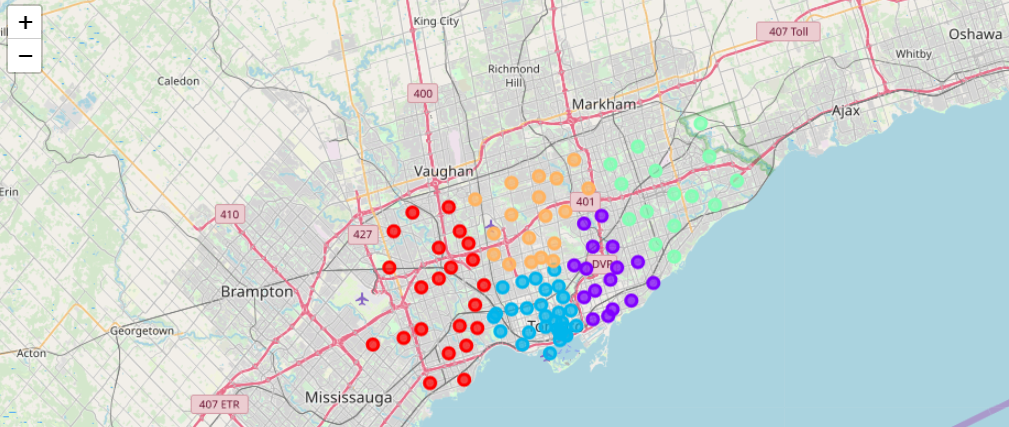